In [134]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [135]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [136]:
import matplotlib.pyplot as plt

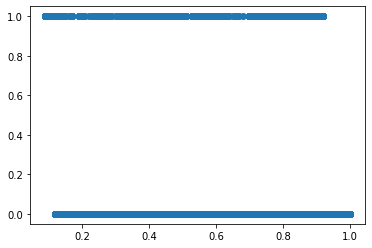

In [137]:
plt.scatter(df["satisfaction_level"],df["left"])  #regression yes

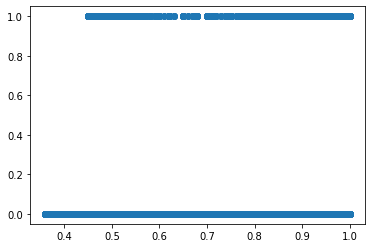

In [138]:
plt.scatter(df["last_evaluation"],df["left"])   #regression yes

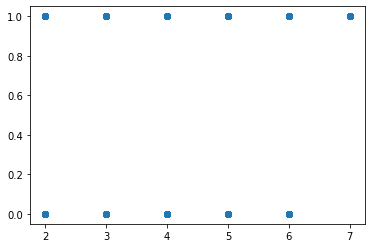

In [139]:

plt.scatter(df["number_project"],df["left"])

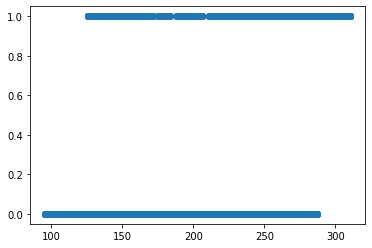

In [140]:

plt.scatter(df["average_montly_hours"],df["left"])  #regression yes

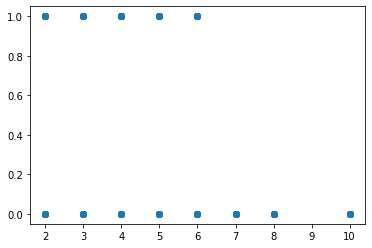

In [141]:
plt.scatter(df["time_spend_company"],df["left"])

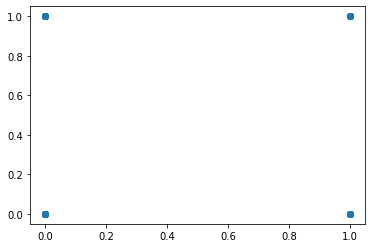

In [142]:
plt.scatter(df["Work_accident"],df["left"])

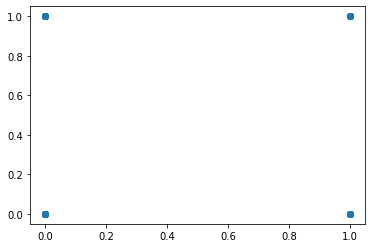

In [143]:
plt.scatter(df["promotion_last_5years"],df["left"])

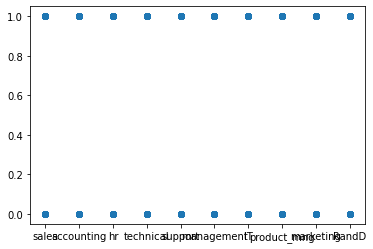

In [144]:
plt.scatter(df["Department"],df["left"])

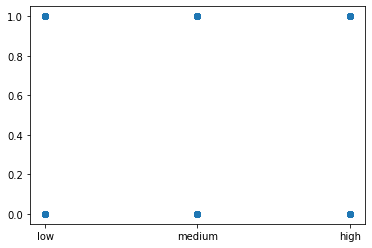

In [145]:
plt.scatter(df["salary"],(df["left"]))

In [146]:
dfLeft = df[(df["left"]==1)]
dfLeft


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [147]:
dfStayed = df[(df["left"]==0)]
dfStayed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [148]:
dfLeft2 = dfLeft.groupby('Department').count()

In [149]:
 dfStayed2 = dfStayed.groupby('Department').count()

<BarContainer object of 10 artists>

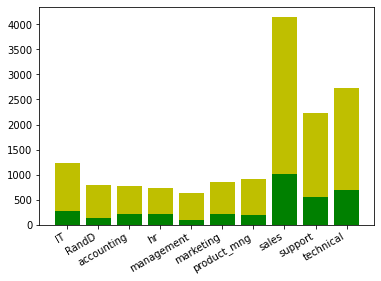

In [150]:

ax= plt.subplot()


# Function to avoid overlapping

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.bar(dfLeft2.index,dfLeft2["left"],color='g')
plt.bar(dfStayed2.index,dfStayed2["left"],color='y', bottom=dfLeft2["left"])

<BarContainer object of 3 artists>

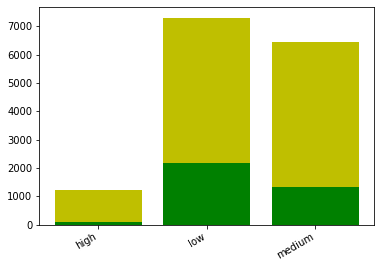

In [151]:
dfLeft3 = dfLeft.groupby('salary').count()
dfStayed3 = dfStayed.groupby('salary').count()


ax= plt.subplot()


# Function to avoid overlapping

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.bar(dfLeft3.index,dfLeft3["left"],color='g')
plt.bar(dfStayed3.index,dfStayed3["left"],color='y', bottom=dfLeft3["left"])

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
df['salary'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)

In [154]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [155]:
dummys = pd.get_dummies(df.salary,prefix="sal")
df = pd.concat([df,dummys],axis="columns")

X = df[["satisfaction_level","last_evaluation","average_montly_hours","sal_0","sal_1"]]
y = df.left
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,sal_0,sal_1,sal_2
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1,0,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,1,0,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,1,0,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,1,0,0


In [156]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [157]:
len(x_train)

11999

In [158]:
len(x_test)

3000

In [159]:
reg = LogisticRegression()

In [160]:
reg.fit(x_train,y_train)

LogisticRegression()

In [161]:
reg.score(x_test,y_test)

0.776

In [122]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730


In [162]:
X = df[["satisfaction_level","Work_accident","promotion_last_5years","sal_0","sal_1"]]
y = df.left

In [196]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [197]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [198]:
reg.score(x_test,y_test)

0.7966666666666666